

### Что нужно сделать

- Загрузить данные и ознакомиться с ними.  
- Разделить данные на обучающую и тестовую выборки.  
- Реализовать построение модели с помощью библиотеки Scikit-learn.  
- Получить качество модели с помощью MSE и MAE.  
- Дополнить данные переменной.  
- Реализовать построение новой модели с помощью библиотеки Scikit-learn.  
- Получить качество новой модели с помощью MSE и MAE.  
- Сравнить полученные модели и сделать выводы.

---

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




---

**Инициализируйте данные.**  
Пусть нам заданы **1000 точек** — это матрица **X**, и есть целевая функция **Y**.

---

In [5]:
np.random.seed(0)  # для воспроизведения результатов
x = np.random.rand(1000, 1)
y = 1 + 3 * x  + np.random.randn(1000, 1)

d = {'x': x.reshape(1, 1000)[0], 'y': y.reshape(1, 1000)[0]}
df = pd.DataFrame(data=d)
df.head()


,x,y
0,0.548814,2.544743
1,0.715189,3.164847
2,0.602763,4.657881
3,0.544883,2.420483
4,0.423655,1.771948


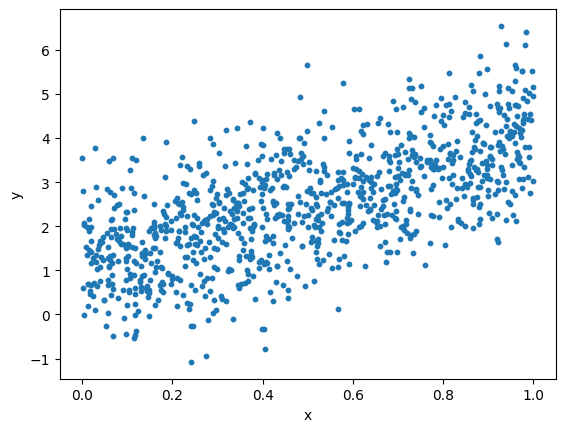

In [6]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



---

### 1. Найдите заданную зависимость с помощью линейной регрессии

Разделите исходные данные на обучающую и тестовую выборки в соотношении 70% и 30%.

---

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7, random_state=123)


In [8]:
from sklearn.linear_model import LinearRegression


In [9]:
model=LinearRegression()
model.fit(train[['x']], train[['y']])

LinearRegression()

In [10]:
print('w_0:', model.intercept_)
print('w_1:', model.coef_)


w_0: [1.08258227]
w_1: [[2.84716323]]




Полученная модель имеет вид: **y\* = 1.08 + 2.85 \* x1**

Напомним, что исходная модель: **y = 1 + 3 \* x + np.random.randn(1000, 1)**

Теперь можно использовать модель для прогноза значений. Для этого будем использовать метод **.predict** — одним из аргументов для данного метода требуется матрица **X**.

---

In [11]:
y_predict_train = model.predict(train[['x']])
print(y_predict_train[:, 0][:10])


[1.78985595 1.45860173 2.99601208 2.15810342 3.66369375 1.16785573
 1.80559558 1.45979619 1.11593418 2.08447907]


In [12]:
y_predict_train = model.intercept_ + model.coef_ * train[['x']]
print(y_predict_train[:10])


            x
498  1.789856
243  1.458602
314  2.996012
202  2.158103
300  3.663694
682  1.167856
230  1.805596
306  1.459796
166  1.115934
620  2.084479


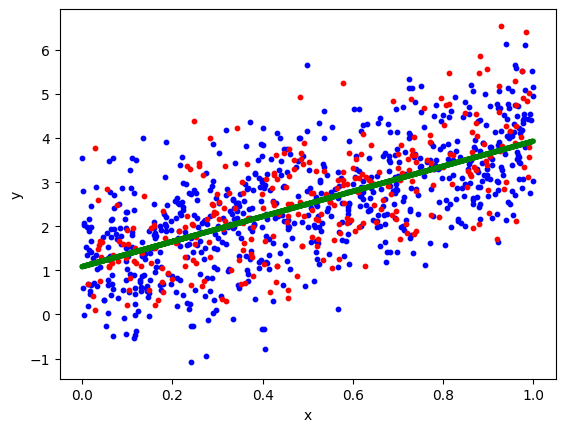

In [15]:

plt.plot(train['x'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [17]:
y_predict_test = model.predict(test[['x']])


In [18]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))


Train MSE: 0.9599829425512107
Test MSE: 0.8715242272540316


In [19]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)

print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))


Train MAE: 0.7845720071057997
Test MAE: 0.7261670560834567


# Task 2

In [20]:
np.random.seed(0)  # для воспроизведения результатов
x = np.random.rand(1000, 1)
y = 1 + 3 * np.log(x) + np.random.randn(1000, 1)

d = {'x': x.reshape(1, 1000)[0], 'y': y.reshape(1, 1000)[0]}
df = pd.DataFrame(data=d)
df.head()


,x,y
0,0.548814,-0.901687
1,0.715189,0.013656
2,0.602763,1.330900
3,0.544883,-1.035718
4,0.423655,-2.075526


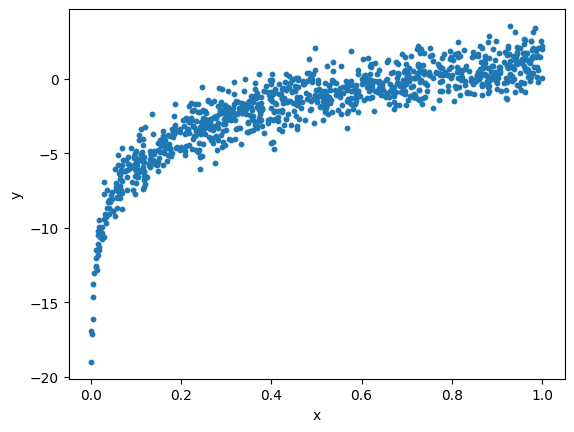

In [21]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [22]:
train, test = train_test_split(df, train_size=0.7, random_state=123)


In [23]:
model = LinearRegression()
model.fit(train[['x']], train[['y']])


LinearRegression()

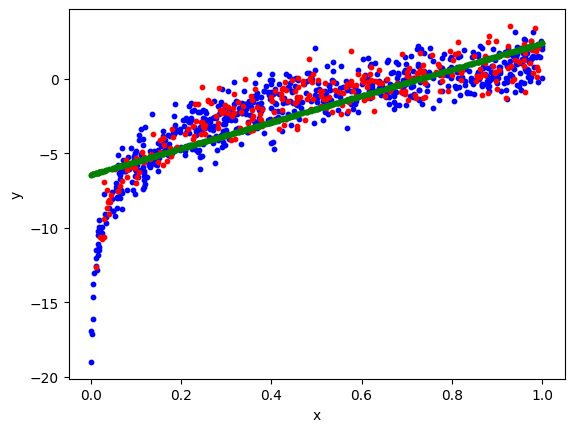

In [24]:
y_predict_train = model.predict(train[['x']])
y_predict_test = model.predict(test[['x']])

plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




**Очевидно, получилось не самое лучшее решение. Посмотрим на качество модели.**

In [25]:
train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))


Train MSE: 3.137684915760023
Test MSE: 1.9666504105743103


In [26]:
train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)

print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))


Train MAE: 1.2394688443948811
Test MAE: 1.0749333352063293


Попробуем улучшить модель, добавив переменную логарифм от переменной **x**.

In [27]:
df['x2'] = df['x'].apply(lambda x: np.log(x))


In [28]:
train, test = train_test_split(df, train_size=0.7, random_state=123)

In [34]:
model = LinearRegression()
model.fit(train[['x', 'x2']], train[['y']])


LinearRegression()

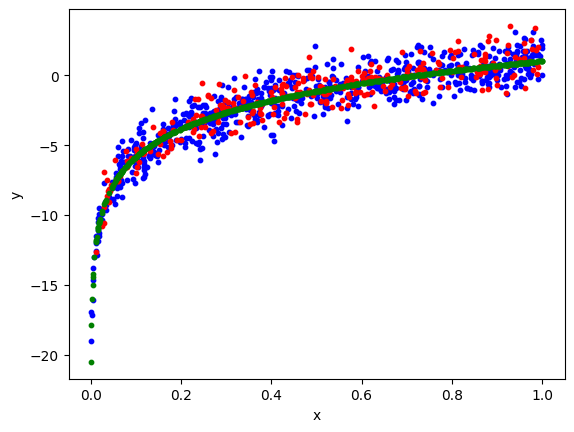

In [35]:
y_predict_train = model.predict(train[['x', 'x2']])
y_predict_test = model.predict(test[['x', 'x2']])

plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




**График уже выглядит лучше. Оценим качество.**

In [36]:
train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.9500342328699919
Test MSE: 0.8666177085273008


In [37]:
train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)

print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 0.7802681943269093
Test MAE: 0.7283304269248565



**Действительно, добавление переменной логарифма от x позволило улучшить качество модели, то есть снизить ошибку.**